<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/Non_Stationarity_in_the_First_Two_Moments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-Stationarity in the First Two Moments
---
## Preamble

Hi, this is a "walk-through" in my project _Financial Data Science in Python_. You can read about what this project is in my article on Medium [Financial Data Science in Python](https://medium.com/adventures-in-data-science/financial-data-science-in-python-ee66dab460cf).

To execute the code in this notebook, you're going to need to upload the my_library.py file from the associated GitHub repository (because Google will delete it when the virtual machine goes away, and so it's likely no longer available here). This is easy, but nothing will work without it.

Once that is done, execute the cells...

In [ ]:
from my_library import *

## The Time-Series of S&P 500 Returns

There is a lot to be learned from simply "looking at" the time-series of S&P 500 Returns over the history of the data. The code below extracts that data and makes a "spike-plot" (not a line-plot, which imbues the data with a spurious continuity) of the time-series.

The plot is annotated with horizontal lines at one, two, and three "sigma" deviations from the mean, where the mean and sample standard deviation are estimated directly from the data. If the data were Normally distributed, it should be within $\pm1\sigma$ of the mean, $\mu$, 68% of the time; within $\pm2\sigma$ 95% of the time; and within $\pm3\sigma$ 99.7% of the time. It clearly isn't!

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Intraday Return,Overnight Return
Date,,,,,,,,,
1928-01-30,17.490000,17.490000,17.490000,17.490000,17.490000,NaN,-1.130587,0.000000,-1.130587
1928-01-31,17.570000,17.570000,17.570000,17.570000,17.570000,NaN,0.457404,0.000000,0.457404
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,NaN,-0.227655,0.000000,-0.227655
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,NaN,0.570442,0.000000,0.570442
1928-02-03,17.400000,17.400000,17.400000,17.400000,17.400000,NaN,-1.304592,0.000000,-1.304592
...,...,...,...,...,...,...,...,...,...
2024-03-12,5134.299805,5179.870117,5114.479980,5175.270020,5175.270020,4.080510e+09,1.120179,0.797971,0.319657
2024-03-13,5173.490234,5179.140137,5151.879883,5165.310059,5165.310059,4.282890e+09,-0.192453,-0.158117,-0.034390
2024-03-14,5175.140137,5176.850098,5123.299805,5150.479980,5150.479980,4.687970e+09,-0.287109,-0.476512,0.190310


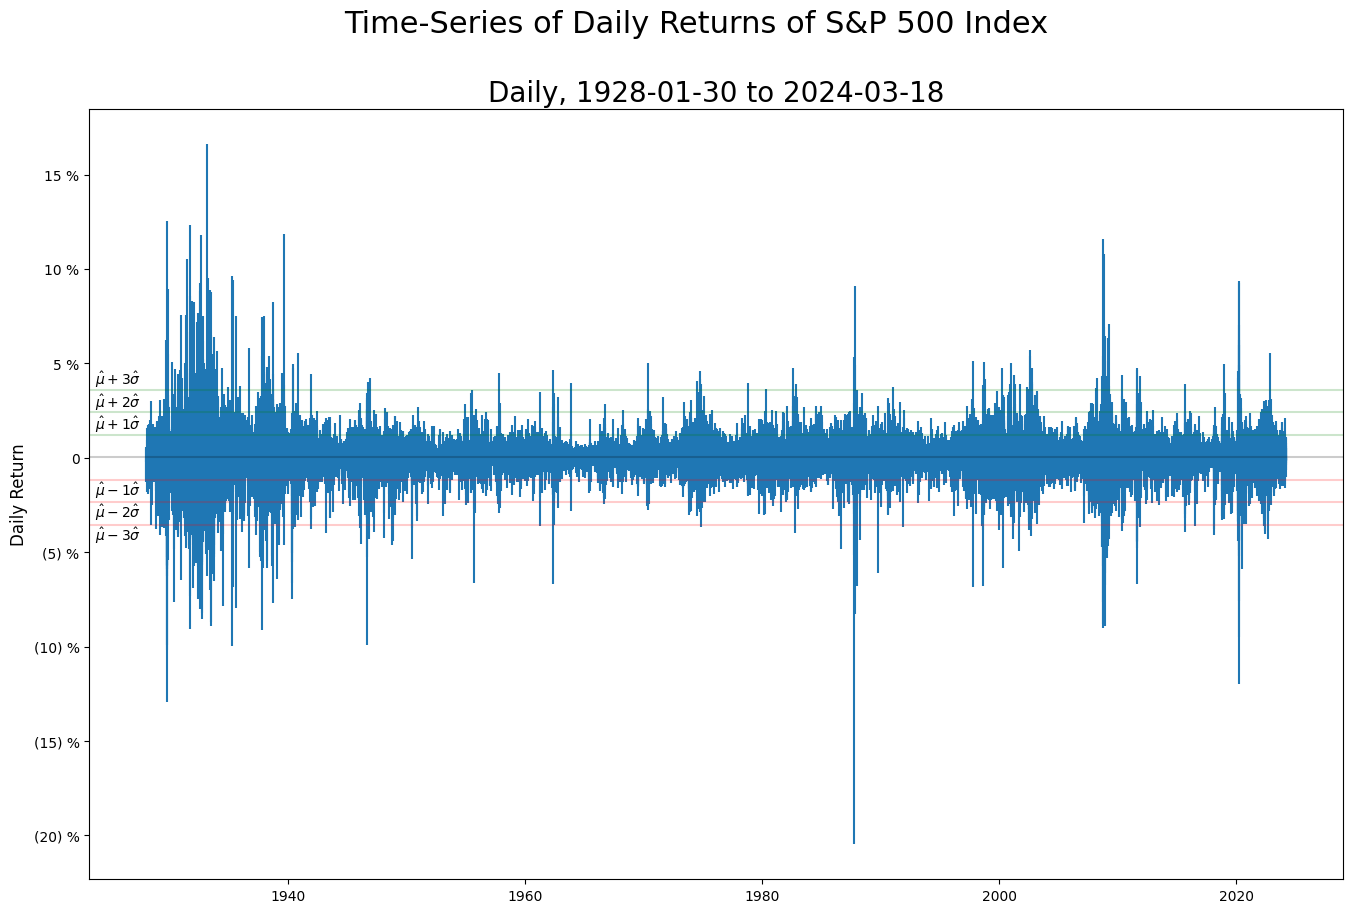

In [ ]:
ticker,begin,end,name='^GSPC','1928-01-27',today('%Y-%m-%d'),'S&P 500 Index'
df=download(ticker,begin,end).dropna()
df['Daily Return']=df['Adj Close'].pct_change()*hundred
df['Intraday Return']=df['Close']/df['Open']*hundred-hundred
df['Overnight Return']=(hundred+df["Daily Return"])/(hundred+df["Intraday Return"])*hundred-hundred
df.index=pd.DatetimeIndex(df.index).to_period('B')
df.dropna(inplace=True)
df.loc[df["Volume"]==0,"Volume"]=np.nan
display(df)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.vlines(df.index.to_timestamp(),zero,df['Daily Return'])
title="Time-Series of Daily Returns of %s" % name
figure.suptitle(title,fontsize=22)
plot.set_title("Daily, %s to %s" % (df.index[0],df.index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.set_ylabel('Daily Return',fontsize=12)
mu,sigma=df['Daily Return'].mean(),df['Daily Return'].std()

for y in np.arange(one,four,one):
    plot.axhline(mu+y*sigma,color='green',alpha=0.2)
    plot.text(df.index[0]-int(252*4.5),mu+y*sigma,'$\\hat{\\mu}%+.0f\\hat{\\sigma}$' % y,ha='left',va='bottom')
    plot.axhline(mu-y*sigma,color='red',alpha=0.2)
    plot.text(df.index[0]-int(252*4.5),mu-y*sigma,'$\\hat{\\mu}%+.0f\\hat{\\sigma}$' % -y,ha='left',va='top')

plot.axhline(mu,color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

## Simulation of Stationary Normal Returns

What would the time-series of returns look like if, in fact, they were drawn from a Normal distribution with a mean of $\hat{\mu}$ and a standard deviation of $\hat{\sigma}$, with those parameters taking the values estimated from the data itself? This is, in fact, very easy to demonstrate via the `scipy.stats` package and its suite of probability distributions and tools.

The code below is a simulation what the above plot _ought_ to look like under the Null hypothesis of Normally distributed returns. Clearly, the real data doesn't look like this.

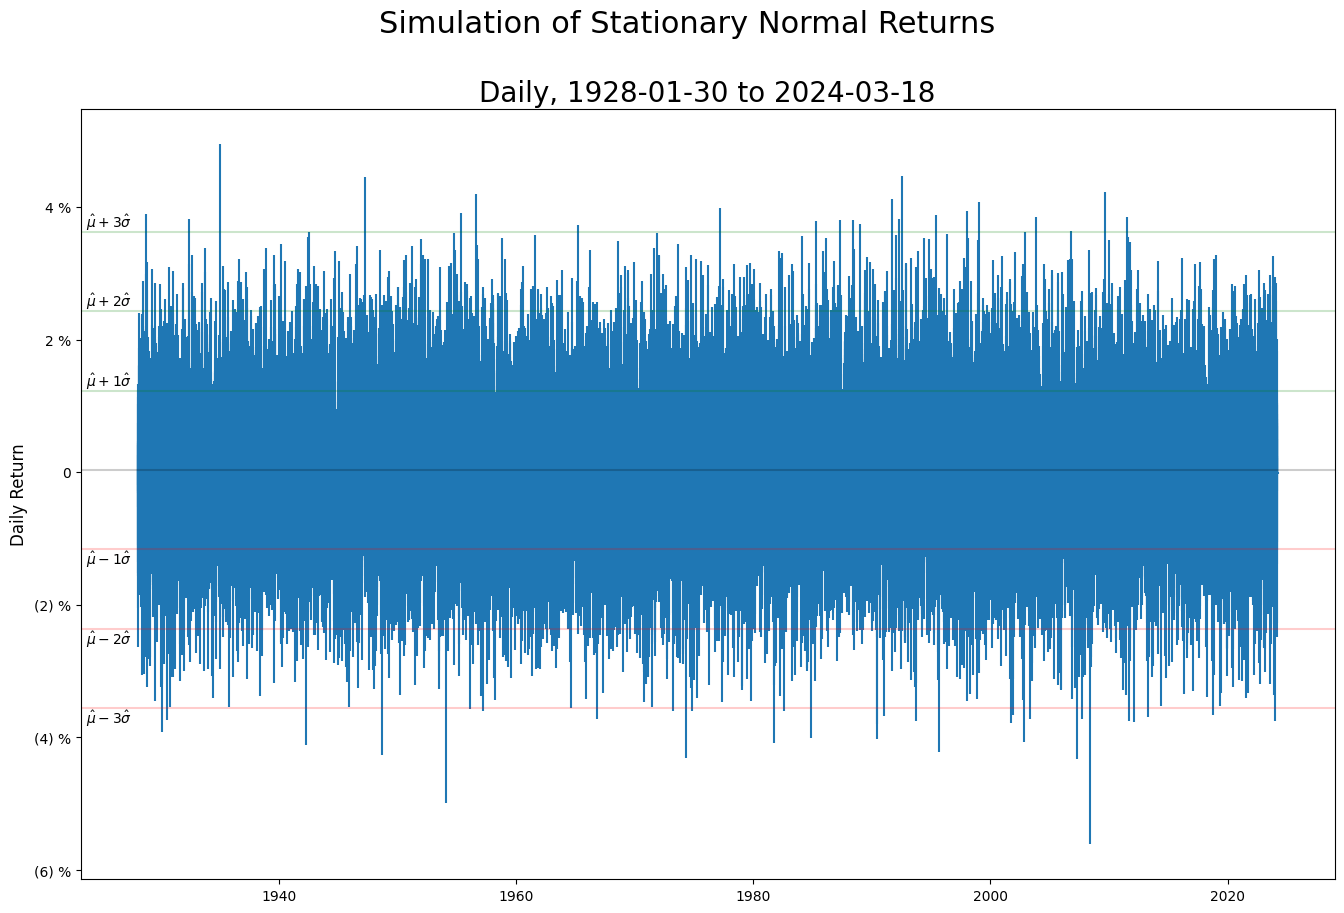

In [ ]:
from scipy.stats import norm
sample=norm(mu,sigma).rvs(df.shape[0])

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.vlines(df.index.to_timestamp(),zero,sample)
title="Simulation of Stationary Normal Returns"
figure.suptitle(title,fontsize=22)
plot.set_title("Daily, %s to %s" % (df.index[0],df.index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.set_ylabel('Daily Return',fontsize=12)

for y in np.arange(one,four,one):
    plot.axhline(mu+y*sigma,color='green',alpha=0.2)
    plot.text(df.index[0]-int(252*4.5),mu+y*sigma,'$\\hat{\\mu}%+.0f\\hat{\\sigma}$' % y,ha='left',va='bottom')
    plot.axhline(mu-y*sigma,color='red',alpha=0.2)
    plot.text(df.index[0]-int(252*4.5),mu-y*sigma,'$\\hat{\\mu}%+.0f\\hat{\\sigma}$' % -y,ha='left',va='top')

plot.axhline(mu,color='black',alpha=0.2)

figure.savefig(title+".png",dpi=300,bbox_inches='tight')

## Simulation of Stationary Generalized Normal Returns

I work with a probability distribution called the Generalized Error distribution and, in particular, with a parameterization of it that looks like this:

$\;\;\;\;\;\;\;\;\;\;f(r|\mu,\sigma,\kappa)=\frac{e^{-\frac{1}{2}\left|\frac{r-\mu}{\sigma}\right|^\frac{1}{\kappa}}}{2^{\kappa+1}\sigma\Gamma(\kappa+1)}.$

I chose to use this particular form because the limit to the Normal distribution is very clear. As $\kappa\rightarrow1/2$, this form becomes:

$\;\;\;\;\;\;\;\;\;\;f(r|\mu,\sigma,1/2)=\frac{e^{-\frac{1}{2}\left(\frac{r-\mu}{\sigma}\right)^2}}{\sqrt{2\pi}\sigma}$.

(To derive this requires the properties of the _Gamma function_, in particular that $z\Gamma(z)=\Gamma(z+1)\Rightarrow\Gamma(3/2)=\Gamma(1/2)/2$ and $\Gamma(1/2)=\sqrt{\pi}$.)

For _general use_, however, others prefer other parameterizations. One popular one is that encoded into `scipy.stats.gennorm`, which is

$\;\;\;\;\;\;\;\;\;\;f(r|\mu,\sigma,\beta)=\frac{\beta e^{-\left|\frac{r-\mu}{\sigma}\right|^\beta}}{2\sigma\Gamma(1/\beta)}$.

For coding efficiency, I will use this form below, which limits to the Laplace distribution when $\beta\rightarrow1\Leftrightarrow\kappa\rightarrow1$. The only changes is $\beta\rightarrow1/\kappa$ and a scaling made to $\sigma$ to extract the $1/2$ that is "naturally" in the Normal distribution.

With those comments made, the code below is identical to the prior apart from the change to calling `gennorm` over `norm` and the explicit use of the `gennorm.fit` method to extract the three parameters of the distribution. The generated data _does_ have more extreme outliers than that for the Normal but it, also, doesn't much look like the real data.

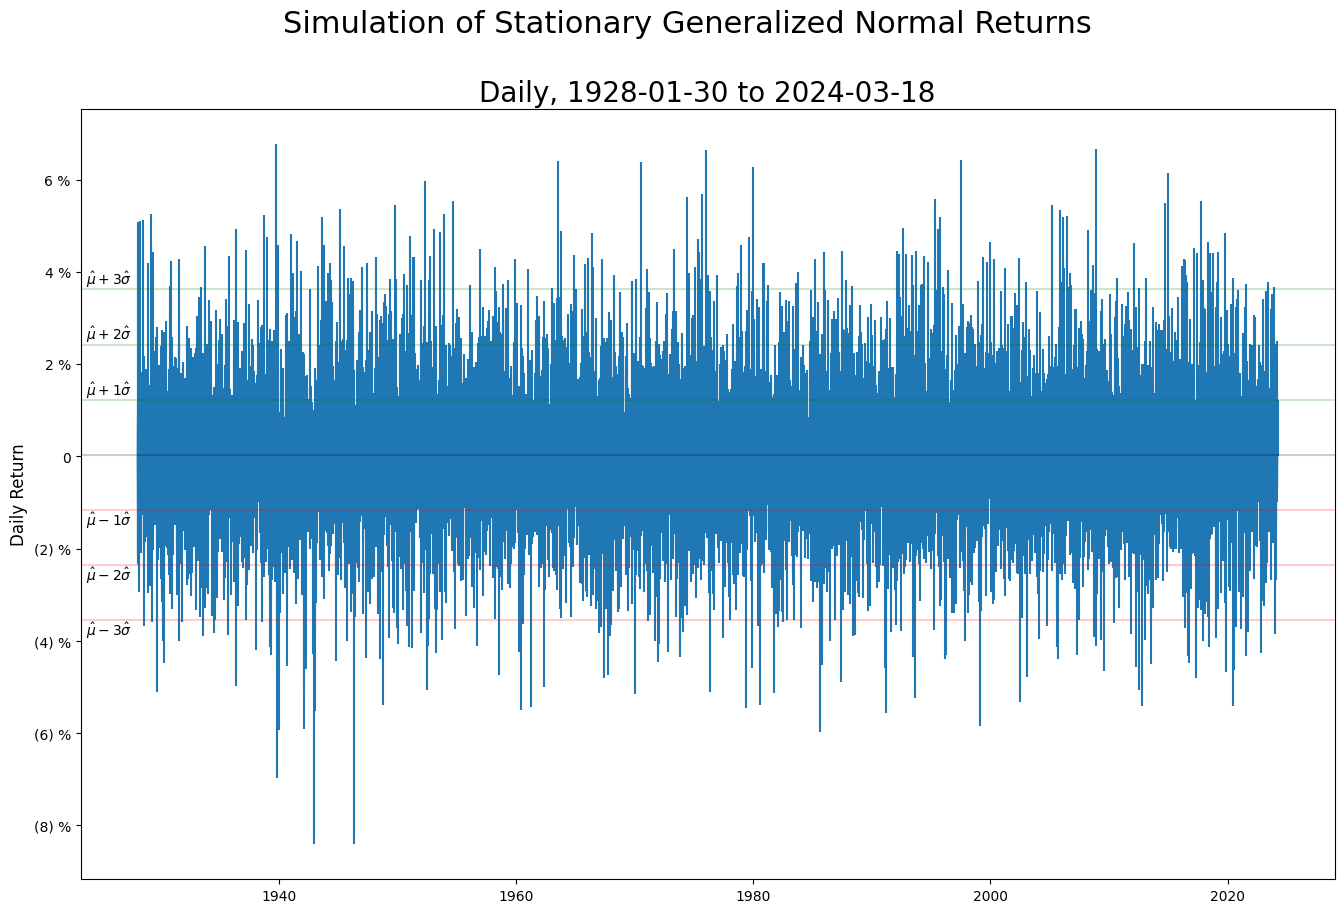

In [ ]:
from scipy.stats import gennorm
params=gennorm.fit(df['Daily Return'])
sample=gennorm(*params).rvs(df.shape[0])

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.vlines(df.index.to_timestamp(),zero,sample)
title="Simulation of Stationary Generalized Normal Returns"
figure.suptitle(title,fontsize=22)
plot.set_title("Daily, %s to %s" % (df.index[0],df.index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.set_ylabel('Daily Return',fontsize=12)

for y in np.arange(one,four,one):
    plot.axhline(mu+y*sigma,color='green',alpha=0.2)
    plot.text(df.index[0]-int(252*4.5),mu+y*sigma,'$\\hat{\\mu}%+.0f\\hat{\\sigma}$' % y,ha='left',va='bottom')
    plot.axhline(mu-y*sigma,color='red',alpha=0.2)
    plot.text(df.index[0]-int(252*4.5),mu-y*sigma,'$\\hat{\\mu}%+.0f\\hat{\\sigma}$' % -y,ha='left',va='top')

plot.axhline(mu,color='black',alpha=0.2)

figure.savefig(title+".png",dpi=300,bbox_inches='tight')

## Non-Stationarity in the Mean

If a simple shift to an intrinsically more _leptokurtotic_ distribution of does not deliver the right kind of time-series, then what might? One obvious feature to look for is non-stationarity (meaning "not staying at the same value through the sample") in (some) of the moments of the distribution. And since our _Null Hypothesis_ is the Normal distribution, there are **only** two moments to consider: the mean, $\mu$, and the standard deviation, $\sigma$. The Normal distribution is **fully specified** by just these two _sufficient statistics_ and there are no other parameters that might be non-stationary.

To inquire as to what effect those changes might have we can, again, play with `scipy.stats` to run some thought experiments. Below is code that composes a set of returns for a simulation of the market by systematically varying the monthly mean by a set of offsets that are a fraction of the most extreme single-days return observed in the data. The final data is then composed together into a single set and the usual histogram is examined.

What we see here is that the generated data is not _leptokurtotic_, or "fat-tailed," but actually _platykurtotic_, or "thin-tailed," with a broad flat maximum. This modification is clearly not a step in the right direction.

  0%|          | 0/603 [00:00<?, ?it/s]

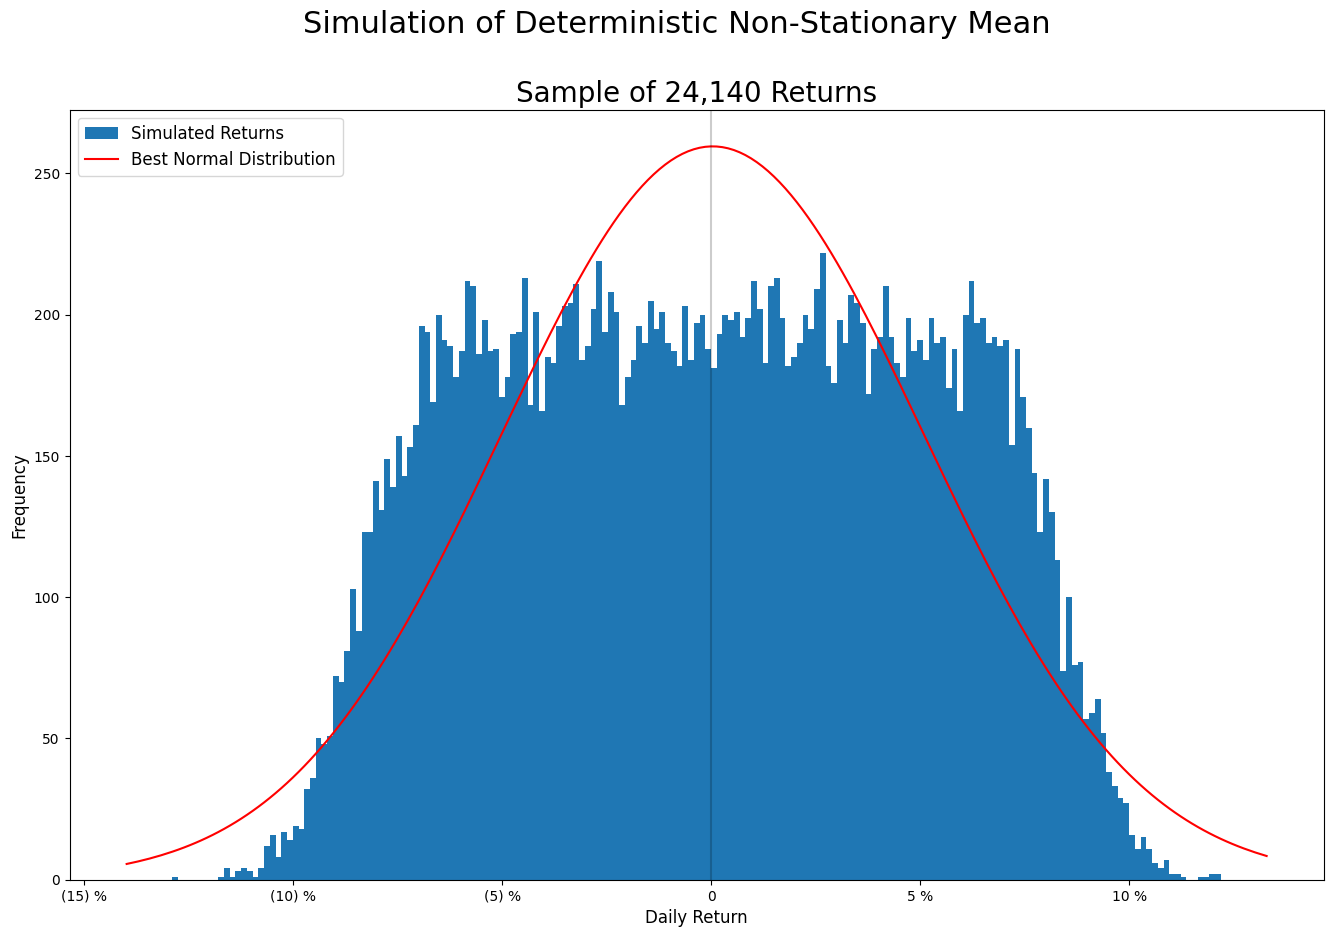

In [ ]:
from tqdm.notebook import tqdm
from scipy.stats import norm
sample=np.array([])

for jitter in tqdm(np.linspace(zero,abs(df['Daily Return']).max()/sigma/two,df.shape[0]//40)):
    sample=np.append(sample,norm(mu+jitter,sigma).rvs(20))
    sample=np.append(sample,norm(mu-jitter,sigma).rvs(20))

sample=np.append(sample,norm(mu,sigma).rvs(20))
sample=sample[:df.shape[0]] # shuffle is not strictly necessary as we only look at distributions
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
counts,bins,patches=plot.hist(sample,bins=np.linspace(sample.min()-sigma,sample.max()+sigma,200),label='Simulated Returns')
params=norm.fit(sample)
plot.plot(bins,norm(*params).pdf(bins)*(bins.max()-bins.min())/len(bins)*len(sample),'r-',label='Best Normal Distribution')
title='Simulation of Deterministic Non-Stationary Mean'
figure.suptitle(title,fontsize=22)
plot.set_title("Sample of {:,d} Returns".format(sample.shape[0]),fontsize=20)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.set_xlabel("Daily Return",fontsize=12)
plot.set_ylabel("Frequency",fontsize=12)
plot.yaxis.set_major_formatter(CountLabels())
plot.axvline(color='black',alpha=0.2)
plot.legend(loc='upper left',fontsize=12)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')


## Non-Stationarity in the Variance

If $\mu\rightarrow\mu_t$ doesn't look like it's going to be a fruitful modification to "rescue" the use of the Normal distribution as an empirically useful description of financial data, what of the variance $\sigma^2\rightarrow\sigma_t^2$?

The code below executes _the same_ deterministic non-stationarity transformation as before, but this time applies it to the standard deviation of the Normal distribution rather than the mean.

The results are clear, this procedure _does_ deliver a distribution that's observed to be _leptokurtotic_ in nature and similar to that we actually do see in the data. Furthermore, it supports a fit to a Generalized Normal that looks very successful.

It appears that **Non-Stationarity in the Variance** is the path to follow in understanding this data, and perhaps it might also rescue the Normal?


  0%|          | 0/1207 [00:00<?, ?it/s]

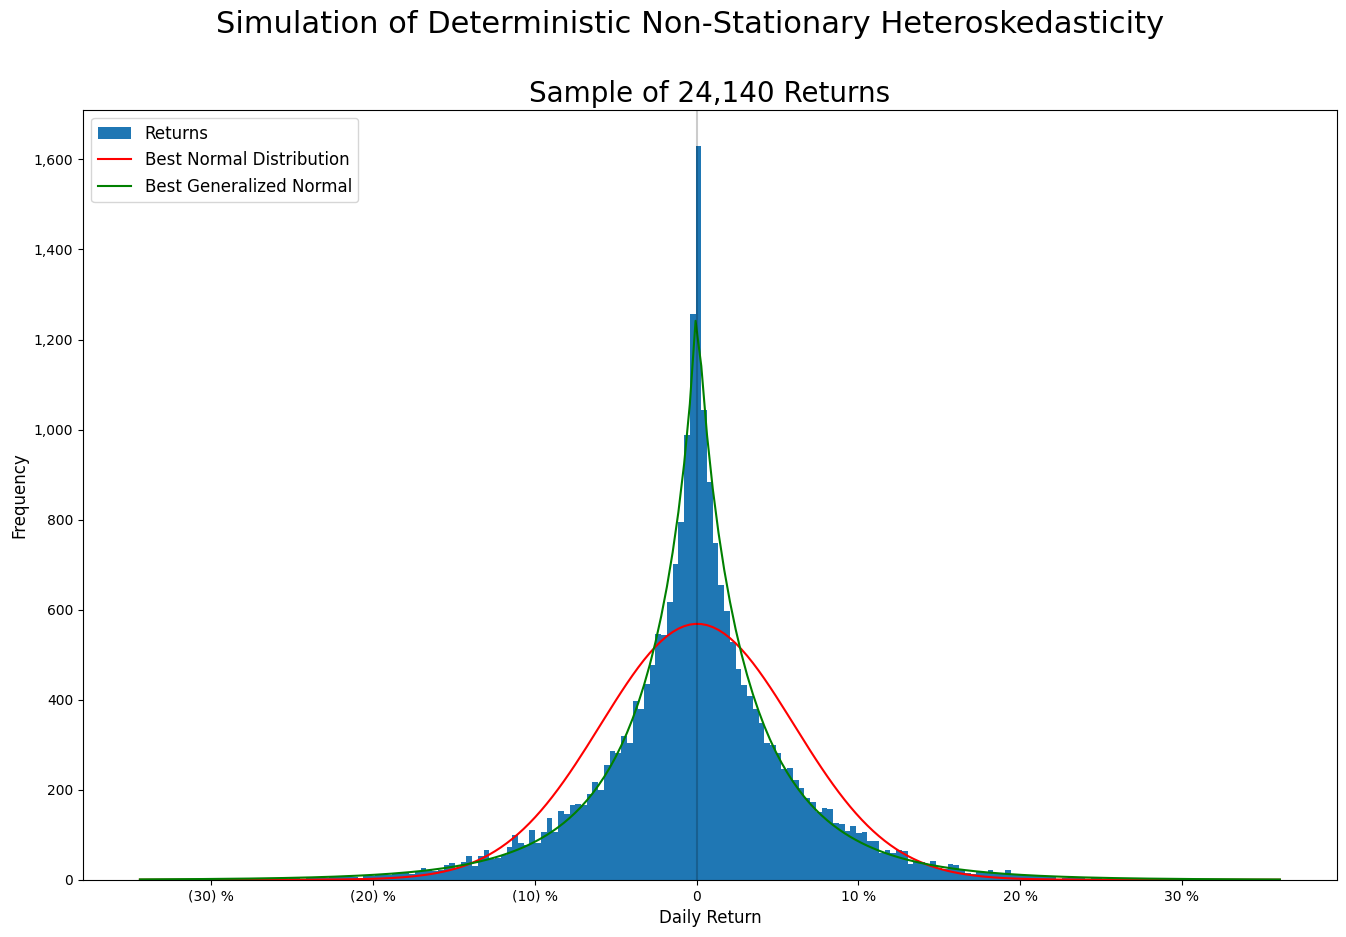

In [ ]:
sample=np.array([])

for jitter in tqdm(np.linspace(zero,abs(df['Daily Return']).max()/sigma/two,df.shape[0]//20)):
    sample=np.append(sample,norm(mu,sigma*jitter).rvs(20))

sample=sample[:df.shape[0]]
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
counts,bins,patches=plot.hist(sample,bins=np.linspace(sample.min()-sigma,sample.max()+sigma,200),label='Simulated Returns')
params=norm.fit(sample)
plot.plot(bins,norm(*params).pdf(bins)*(bins.max()-bins.min())/len(bins)*len(sample),'r-',label='Best Normal Distribution')
params=gennorm.fit(sample)
plot.plot(bins,gennorm(*params).pdf(bins)*(bins.max()-bins.min())/len(bins)*len(sample),'g-',label='Best Generalized Normal')
title='Simulation of Deterministic Non-Stationary Heteroskedasticity'
figure.suptitle(title,fontsize=22)
plot.set_title("Sample of {:,d} Returns".format(sample.shape[0]),fontsize=20)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.set_xlabel("Daily Return",fontsize=12)
plot.set_ylabel("Frequency",fontsize=12)
plot.yaxis.set_major_formatter(CountLabels())
plot.axvline(color='black',alpha=0.2)
plot.legend(loc='upper left',fontsize=12)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')